In [1]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# загружаем данные из файла в формате xlsx, указываем символ-разделитель и сохраняем данные в дата-фрейм (переменную df)
df = pd.read_csv('sgfdh.csv', sep = ',')

In [3]:
# проверяем, что данные загрузились - выводим первые несколько строк таблицы
df.head(10)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,739,52,58.24,4,2,1,3,1
1,76,20,60.10,2,1,1,3,0
2,486,66,61.01,5,2,1,3,1
3,992,28,62.02,10,5,1,3,1
4,607,12,62.92,17,7,2,3,0
5,845,16,65.81,5,3,2,3,0
6,1387,15,66.06,15,7,2,3,0
7,1402,48,66.51,8,4,1,3,1
8,747,22,66.78,10,5,1,3,1
9,1465,16,67.94,12,6,1,3,1


### Описание данных

Признаки:
- booking_id – Уникальный идентификатор бронирования
- months_as_member – Количество месяцев членства в этом фитнес-клубе, минимум 1 месяц
- weight – Вес участника в кг, округленный до 2 знаков после запятой.
- days_before – Количество дней до занятия, на которое зарегистрирован участник
- day_of_week – День недели занятия
- time – Время дня занятия. Либо AM, либо PM
- category - Категория фитнес-класса
- attended - Посещал ли участник занятия (1) или нет (0)

Целевой (искомый) признак:
- attended – факт ухода клиента

In [5]:
# объём данных (строк и столбцов - объектов и признаков)
df.shape

(1467, 8)

In [6]:
# выводим типы данных
df.dtypes

booking_id            int64
months_as_member      int64
weight              float64
days_before           int64
day_of_week           int64
time                  int64
category              int64
attended              int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1467 non-null   int64  
 1   months_as_member  1467 non-null   int64  
 2   weight            1467 non-null   float64
 3   days_before       1467 non-null   int64  
 4   day_of_week       1467 non-null   int64  
 5   time              1467 non-null   int64  
 6   category          1467 non-null   int64  
 7   attended          1467 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 91.8 KB


In [8]:
# имена колонок в виде списка
columns = df.columns
columns

Index(['booking_id', 'months_as_member', 'weight', 'days_before',
       'day_of_week', 'time', 'category', 'attended'],
      dtype='object')

In [9]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке booking_id = 0
Кол-во пропусков в колонке months_as_member = 0
Кол-во пропусков в колонке weight = 0
Кол-во пропусков в колонке days_before = 0
Кол-во пропусков в колонке day_of_week = 0
Кол-во пропусков в колонке time = 0
Кол-во пропусков в колонке category = 0
Кол-во пропусков в колонке attended = 0


In [10]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке booking_id = 0
Кол-во пропусков в колонке months_as_member = 0
Кол-во пропусков в колонке weight = 0
Кол-во пропусков в колонке days_before = 0
Кол-во пропусков в колонке day_of_week = 0
Кол-во пропусков в колонке time = 0
Кол-во пропусков в колонке category = 0
Кол-во пропусков в колонке attended = 0


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
booking_id,1467.0,748.854806,433.964141,1.00,372.50,750.00,1125.50,1500.00
months_as_member,1467.0,15.664622,12.977391,1.00,8.00,12.00,19.00,148.00
weight,1467.0,82.622379,12.781539,55.41,73.49,80.76,89.52,170.52
days_before,1467.0,8.361963,4.081101,1.00,4.00,9.00,12.00,29.00
day_of_week,1467.0,4.112474,1.994953,1.00,2.00,4.00,6.00,7.00
time,1467.0,1.237219,0.425523,1.00,1.00,1.00,1.00,2.00
category,1467.0,2.673483,1.261941,1.00,2.00,2.00,4.00,5.00
attended,1467.0,0.304703,0.460439,0.00,0.00,0.00,1.00,1.00


In [12]:
df.loc[df['day_of_week'] == 'Mon', 'day_of_week'] = 1

In [13]:
df.loc[df['day_of_week'] == '1day', 'day_of_week'] = 1

In [14]:
df.loc[df['day_of_week'] == 'Monday' , 'day_of_week'] = 1

In [15]:
df.loc[df['day_of_week'] == 'Tue', 'day_of_week'] = 2

In [16]:
df.loc[df['day_of_week'] == 'Tuesday', 'day_of_week'] = 2

In [17]:
df.loc[df['day_of_week'] == 'Wed', 'day_of_week'] = 3

In [18]:
df.loc[df['day_of_week'] == 'Wednesday', 'day_of_week'] = 3

In [19]:
df.loc[df['day_of_week'] == 'Thu', 'day_of_week'] = 4

In [20]:
df.loc[df['day_of_week'] == 'Thuesday', 'day_of_week'] = 4

In [21]:
df.loc[df['day_of_week'] == 'Fri', 'day_of_week'] = 5

In [22]:
df.loc[df['day_of_week'] == 'Fri.', 'day_of_week'] = 5

In [23]:
df.loc[df['day_of_week'] == 'Friday', 'day_of_week'] = 5

In [24]:
df.loc[df['day_of_week'] == 'Sat', 'day_of_week'] = 6

In [25]:
df.loc[df['day_of_week'] == 'Sataturday', 'day_of_week'] = 6

In [26]:
df.loc[df['day_of_week'] == 'Sun', 'day_of_week'] = 7

In [27]:
df.loc[df['day_of_week'] == 'Sunday', 'day_of_week'] = 7

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
booking_id,1467.0,748.854806,433.964141,1.00,372.50,750.00,1125.50,1500.00
months_as_member,1467.0,15.664622,12.977391,1.00,8.00,12.00,19.00,148.00
weight,1467.0,82.622379,12.781539,55.41,73.49,80.76,89.52,170.52
days_before,1467.0,8.361963,4.081101,1.00,4.00,9.00,12.00,29.00
day_of_week,1467.0,4.112474,1.994953,1.00,2.00,4.00,6.00,7.00
time,1467.0,1.237219,0.425523,1.00,1.00,1.00,1.00,2.00
category,1467.0,2.673483,1.261941,1.00,2.00,2.00,4.00,5.00
attended,1467.0,0.304703,0.460439,0.00,0.00,0.00,1.00,1.00


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1467 non-null   int64  
 1   months_as_member  1467 non-null   int64  
 2   weight            1467 non-null   float64
 3   days_before       1467 non-null   int64  
 4   day_of_week       1467 non-null   int64  
 5   time              1467 non-null   int64  
 6   category          1467 non-null   int64  
 7   attended          1467 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 91.8 KB


<Axes: xlabel='attended'>

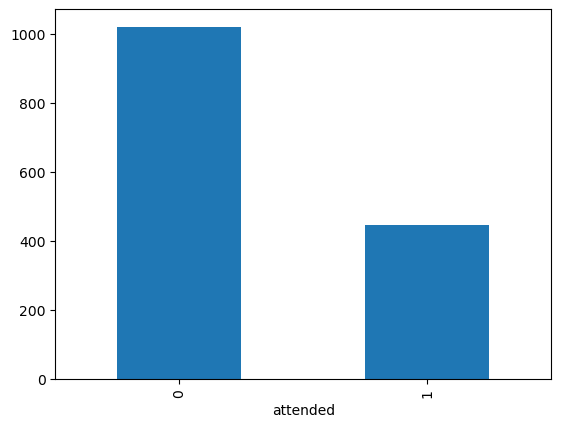

In [31]:
df['attended'].value_counts(normalize=False).plot.bar()

In [32]:
df.loc[df['time'] == 'AM', 'time'] = 1

In [33]:
df.loc[df['time'] == 'PM', 'time'] = 2

In [34]:
columns = df.columns
columns

Index(['booking_id', 'months_as_member', 'weight', 'days_before',
       'day_of_week', 'time', 'category', 'attended'],
      dtype='object')

In [35]:
# матрица коррелаций
corr = df[columns].corr()
corr

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
booking_id,1.000000,0.003939,-0.006701,0.025956,0.023979,0.054983,0.013728,0.022534
months_as_member,0.003939,1.000000,-0.467656,-0.000218,0.005331,-0.014735,-0.000485,0.482194
weight,-0.006701,-0.467656,1.000000,0.000747,-0.002696,0.008536,0.033565,-0.286895
days_before,0.025956,-0.000218,0.000747,1.000000,0.980201,-0.045157,0.015547,0.016772
day_of_week,0.023979,0.005331,-0.002696,0.980201,1.000000,-0.089307,0.015952,0.027272
time,0.054983,-0.014735,0.008536,-0.045157,-0.089307,1.000000,0.000798,-0.052351
category,0.013728,-0.000485,0.033565,0.015547,0.015952,0.000798,1.000000,0.004641
attended,0.022534,0.482194,-0.286895,0.016772,0.027272,-0.052351,0.004641,1.000000


In [36]:
df.loc[df['category'] == 'Strength', 'category'] = 1

In [37]:
df.loc[df['category'] == 'HIIT', 'category'] = 2

In [38]:
df.loc[df['category'] == 'Cycling', 'category'] = 4

In [39]:
df.loc[df['category'] == 'Aqua', 'category'] = 3

In [40]:
df.loc[df['category'] == 'Yoga', 'category'] = 2

<Axes: >

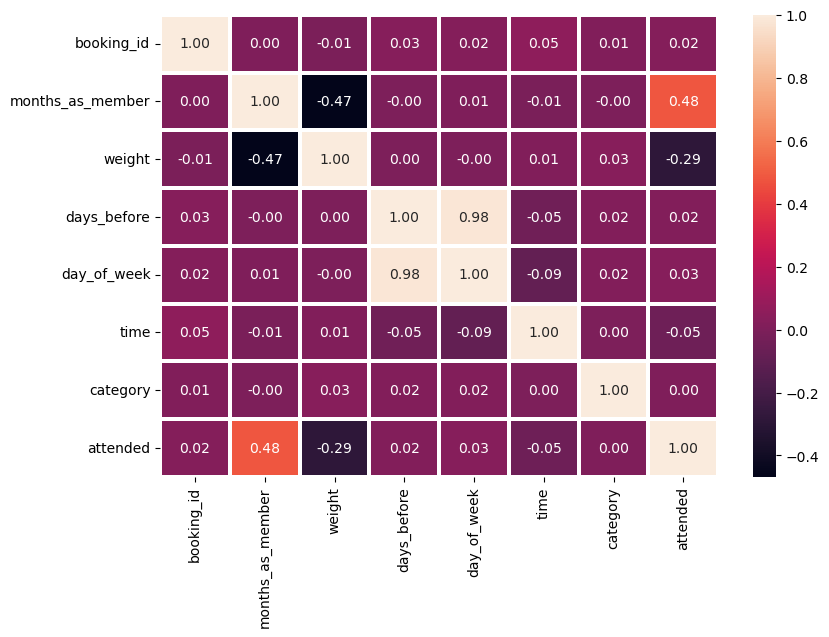

In [41]:
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f',ax=ax)

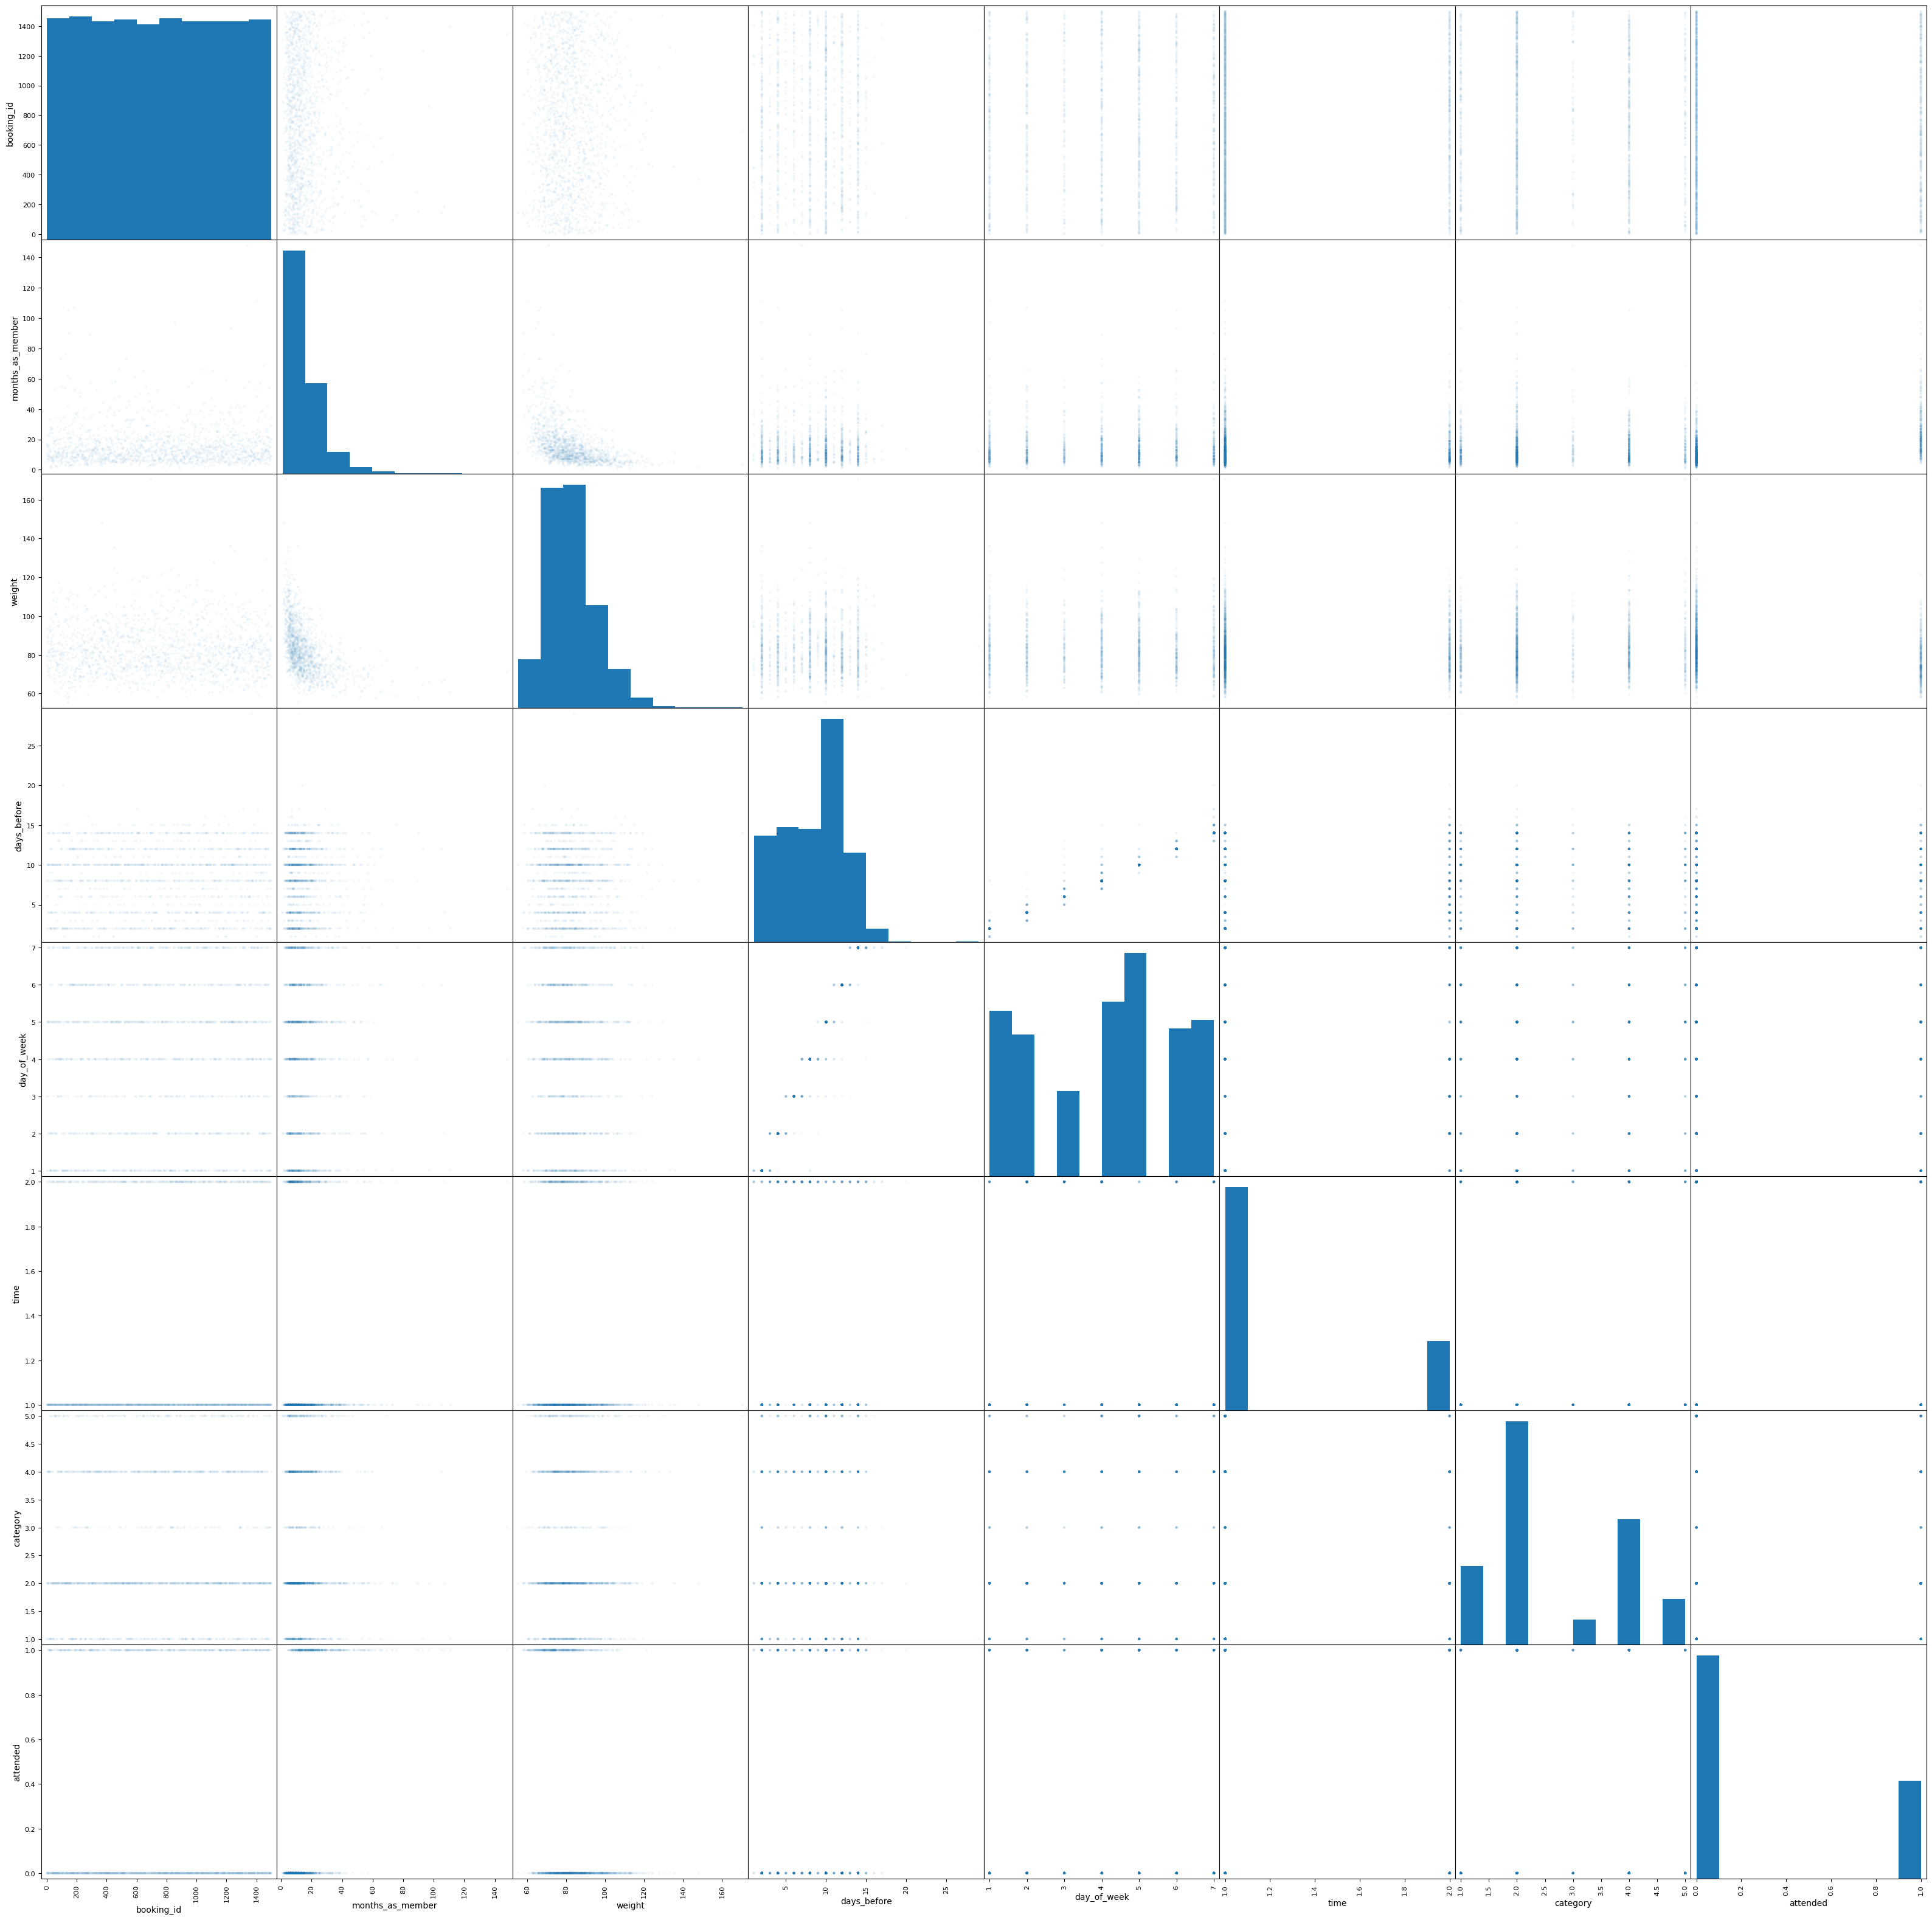

In [42]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[columns], alpha=0.05, figsize=(40, 40));

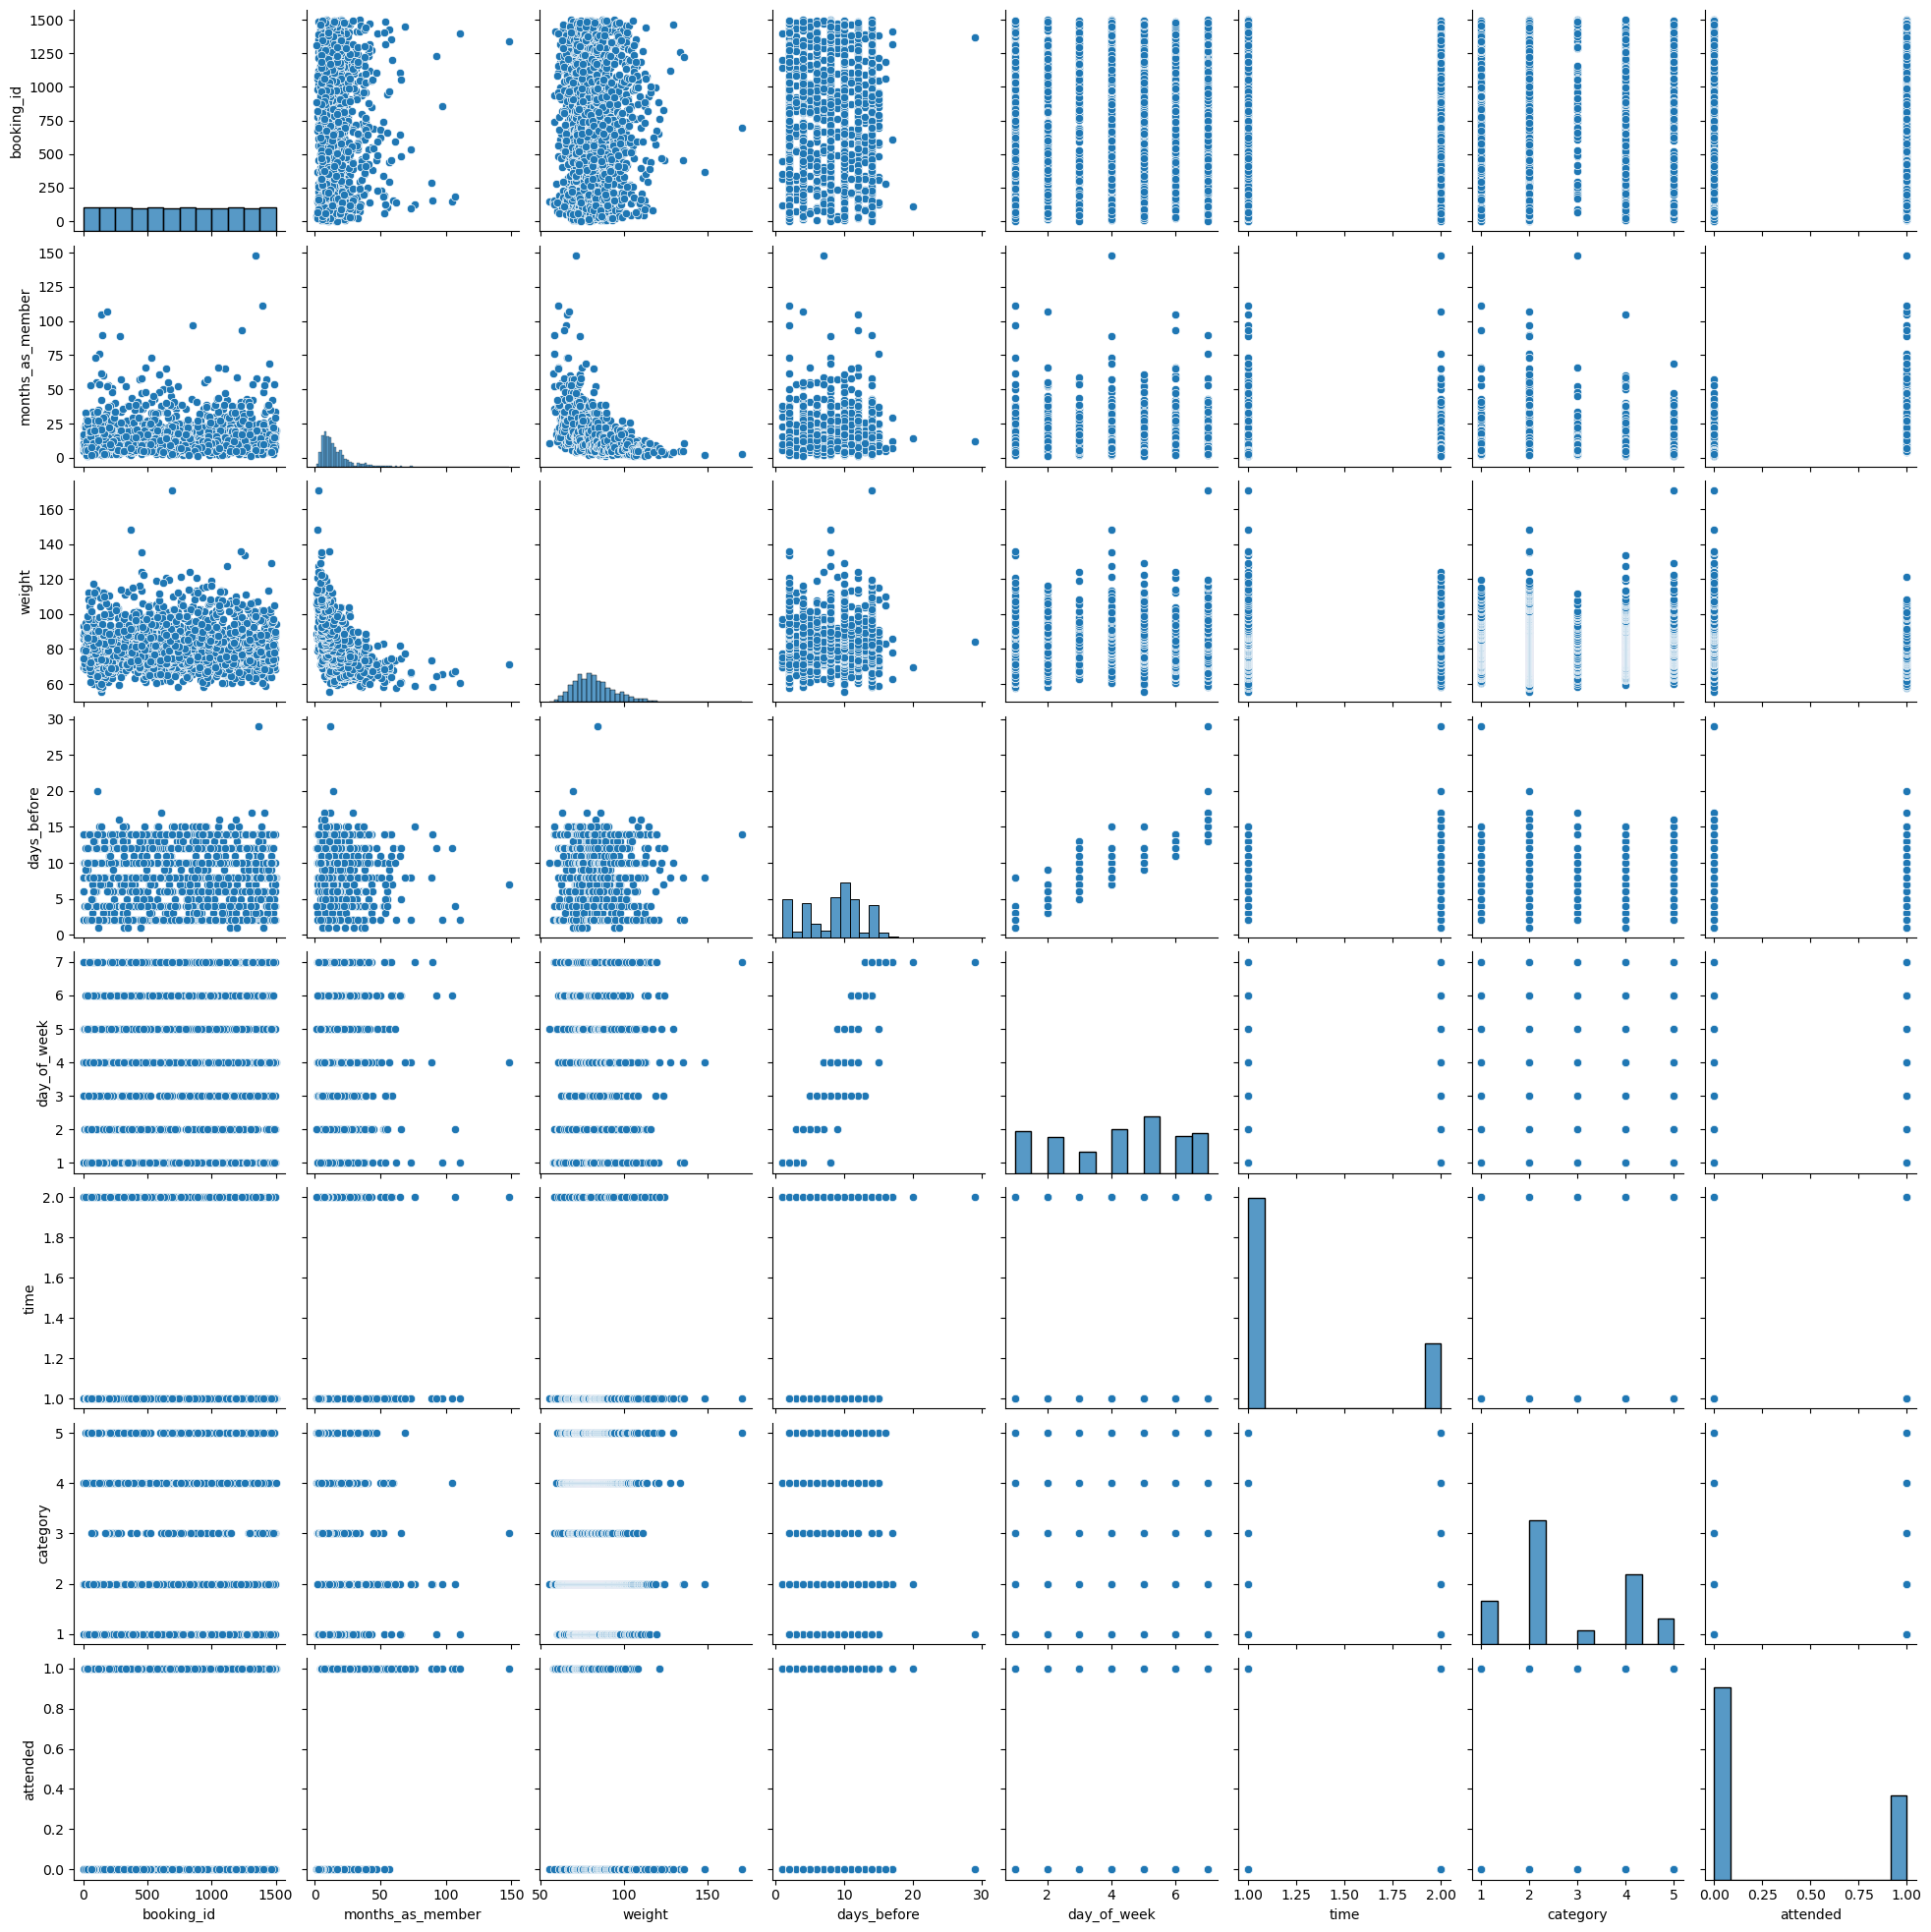

In [43]:
sns.pairplot(df[columns])

In [44]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467 entries, 0 to 1466
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1467 non-null   int64  
 1   months_as_member  1467 non-null   int64  
 2   weight            1467 non-null   float64
 3   days_before       1467 non-null   int64  
 4   day_of_week       1467 non-null   int64  
 5   time              1467 non-null   int64  
 6   category          1467 non-null   int64  
 7   attended          1467 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 91.8 KB


In [45]:
df.head(10)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,739,52,58.24,4,2,1,3,1
1,76,20,60.10,2,1,1,3,0
2,486,66,61.01,5,2,1,3,1
3,992,28,62.02,10,5,1,3,1
4,607,12,62.92,17,7,2,3,0
5,845,16,65.81,5,3,2,3,0
6,1387,15,66.06,15,7,2,3,0
7,1402,48,66.51,8,4,1,3,1
8,747,22,66.78,10,5,1,3,1
9,1465,16,67.94,12,6,1,3,1


In [46]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
booking_id,1467.0,748.854806,433.964141,1.00,372.50,750.00,1125.50,1500.00
months_as_member,1467.0,15.664622,12.977391,1.00,8.00,12.00,19.00,148.00
weight,1467.0,82.622379,12.781539,55.41,73.49,80.76,89.52,170.52
days_before,1467.0,8.361963,4.081101,1.00,4.00,9.00,12.00,29.00
day_of_week,1467.0,4.112474,1.994953,1.00,2.00,4.00,6.00,7.00
time,1467.0,1.237219,0.425523,1.00,1.00,1.00,1.00,2.00
category,1467.0,2.673483,1.261941,1.00,2.00,2.00,4.00,5.00
attended,1467.0,0.304703,0.460439,0.00,0.00,0.00,1.00,1.00


In [47]:
features_names = df.columns
features_names

Index(['booking_id', 'months_as_member', 'weight', 'days_before',
       'day_of_week', 'time', 'category', 'attended'],
      dtype='object')

In [48]:
X = df

In [49]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df['attended']

### Modelling

In [51]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [52]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(982, 8) (485, 8) (982,) (485,)


In [53]:
from sklearn.metrics import accuracy_score

### KNeighborsClassifier (Классификация ближайших соседей)

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
X_train

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
1262,783,15,85.42,12,6,1,1,0
1246,1264,19,83.47,12,6,1,1,0
1018,1017,3,98.39,8,4,1,2,0
558,331,10,70.61,8,4,1,2,0
490,152,15,66.24,8,4,1,2,0
...,...,...,...,...,...,...,...,...
1130,179,12,69.33,4,2,1,1,0
1294,281,9,93.47,8,4,2,1,0
860,341,6,85.36,14,7,1,2,0
1459,870,5,108.14,8,4,1,5,1


In [57]:
X_test

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
1192,1369,18,77.85,8,4,1,1,1
184,871,13,75.62,7,3,2,4,0
1220,1216,7,80.56,12,6,1,1,0
67,182,5,99.45,10,5,1,3,0
220,1447,22,78.21,4,2,1,4,0
...,...,...,...,...,...,...,...,...
865,1159,20,85.50,4,2,2,2,1
858,962,8,85.28,2,1,1,2,0
390,314,23,94.94,1,1,2,4,1
808,1266,5,82.14,4,2,1,2,0


In [58]:
y_train

1262    0
1246    0
1018    0
558     0
490     0
       ..
1130    0
1294    0
860     0
1459    1
1126    1
Name: attended, Length: 982, dtype: int64

In [59]:
y_test

1192    1
184     0
1220    0
67      0
220     0
       ..
865     1
858     0
390     1
808     0
1046    0
Name: attended, Length: 485, dtype: int64

In [60]:
%%time
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 9.28 ms


KNeighborsClassifier()

In [61]:
# making prediction
knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [62]:
knn_pred_test = knn.predict(X_test)
display(knn_pred_test[:20], np.array(y_test[:20]))

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1],
      dtype=int64)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [63]:
# performance measurement
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.7993890020366599
test accuracy:  0.7216494845360825


In [64]:
knn_accuracy = accuracy_score(y_test, y_test_predict, normalize=True)
knn_accuracy

0.7216494845360825

### Gaussian Naive Bayes (НАИВНЫЙ БАЙЕСОВСКИЙ КЛАССИФИКАТОР)

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 0 ns
Wall time: 8 ms


GaussianNB()

In [68]:
gnb_pred_test = gnb.predict(X_test)
display(gnb_pred_test[:20], np.array(y_test[:20]))

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [69]:
# performance measurement
from sklearn.metrics import accuracy_score
accuracy_score(y_test, gnb_pred_test)

1.0

In [70]:
gnb_accuracy = accuracy_score(y_test, gnb_pred_test)

### Random Forest Classifier (Классификатор дерева решений)

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

CPU times: total: 875 ms
Wall time: 715 ms


In [74]:
rfc_pred_test = rfc.predict(X_test)
display(rfc_pred_test[:20], np.array(y_test[:20]))

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [75]:
# performance measurement
from sklearn.metrics import accuracy_score


In [76]:
rfc_accuracy = accuracy_score(y_test, rfc_pred_test)

In [271]:
rfc_accuracy

1.0

### Logistic Regression (Логистическая регрессия)

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.transform(X_test)

In [80]:
sc_X_train

array([[ 0.07003538, -0.04769546,  0.23433429, ..., -0.57186277,
        -1.32351259, -0.65528864],
       [ 1.18622975,  0.25993632,  0.08265492, ..., -0.57186277,
        -1.32351259, -0.65528864],
       [ 0.61304886, -0.97059077,  1.24319657, ..., -0.57186277,
        -0.52073967, -0.65528864],
       ...,
       [-0.95565674, -0.73986694,  0.22966723, ..., -0.57186277,
        -0.52073967, -0.65528864],
       [ 0.27192501, -0.81677489,  2.00159342, ..., -0.57186277,
         1.88757911,  1.52604507],
       [-1.23412519,  0.87519986, -1.0646634 , ..., -0.57186277,
        -1.32351259,  1.52604507]])

In [81]:
sc_X_test

array([[ 1.42988965,  0.18302837, -0.3544928 , ..., -0.57186277,
        -1.32351259,  1.52604507],
       [ 0.27424558, -0.20151134, -0.52795178, ...,  1.74867128,
         1.08480618, -0.65528864],
       [ 1.07484237, -0.662959  , -0.14369737, ..., -0.57186277,
        -1.32351259, -0.65528864],
       ...,
       [-1.01831214,  0.56756809,  0.97484076, ...,  1.74867128,
         1.08480618,  1.52604507],
       [ 1.19087089, -0.81677489, -0.02079819, ..., -0.57186277,
        -0.52073967, -0.65528864],
       [ 1.22567945, -0.662959  ,  1.57066844, ..., -0.57186277,
        -0.52073967, -0.65528864]])

In [82]:
%%time
lr = LogisticRegression(random_state = 42)
lr.fit(sc_X_train, y_train)

CPU times: total: 78.1 ms
Wall time: 115 ms


LogisticRegression(random_state=42)

In [83]:
lr_pred_test = lr.predict(sc_X_test)
display(lr_pred_test[:20], np.array(y_test[:20]))

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
      dtype=int64)

In [84]:
# performance measurement
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_pred_test)

1.0

In [85]:
lr_accuracy = accuracy_score(y_test, lr_pred_test)

In [86]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [87]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy, lr_accuracy]


In [88]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.721649
1,Gaussian Naive Bayes,1.000000
2,Random Forest Classifier,1.000000
3,Logistic Regression,1.000000


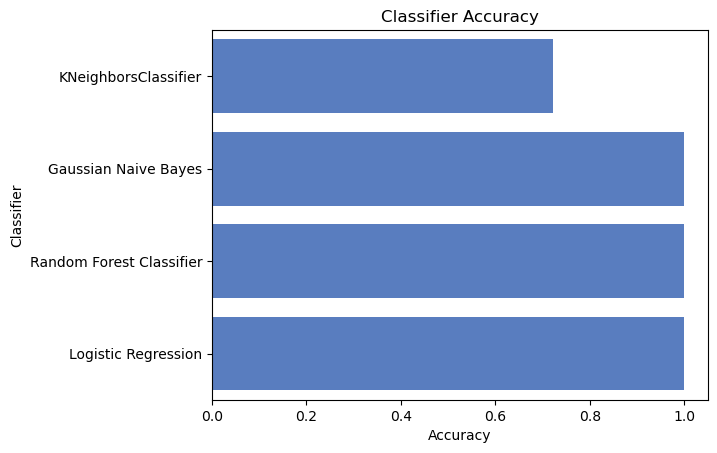

In [89]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");

In [90]:
# performance measurement
# y_train_predict = knn.predict(X_train)
# y_test_predict = knn.predict(X_test)

knn_y_train_predict = knn.predict(X_train)
knn_y_test_predict = knn.predict(X_test)

gnb_y_train_predict = gnb.predict(X_train)
gnb_y_test_predict = gnb.predict(X_test)

rfc_y_train_predict = rfc.predict(X_train)
rfc_y_test_predict = rfc.predict(X_test)

lr_y_train_predict = lr.predict(X_train.values)
lr_y_test_predict = lr.predict(X_test.values)

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [92]:
knn_cm = confusion_matrix(y_test, knn_y_test_predict)
gnb_cm = confusion_matrix(y_test, gnb_y_test_predict)
rfc_cm = confusion_matrix(y_test, rfc_y_test_predict)
lr_cm = confusion_matrix(y_test, lr_y_test_predict)
print(knn_cm)
print(gnb_cm)
print(rfc_cm)
print(lr_cm)

[[293  40]
 [ 95  57]]
[[333   0]
 [  0 152]]
[[333   0]
 [  0 152]]
[[331   2]
 [112  40]]


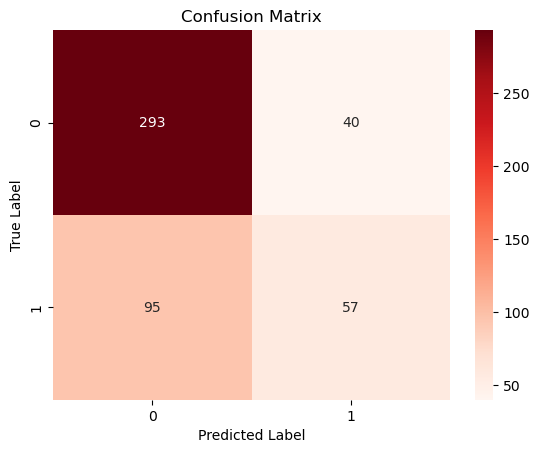

In [93]:
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

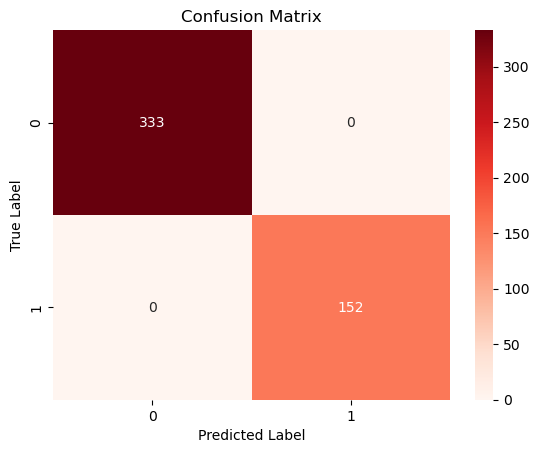

In [94]:
sns.heatmap(gnb_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

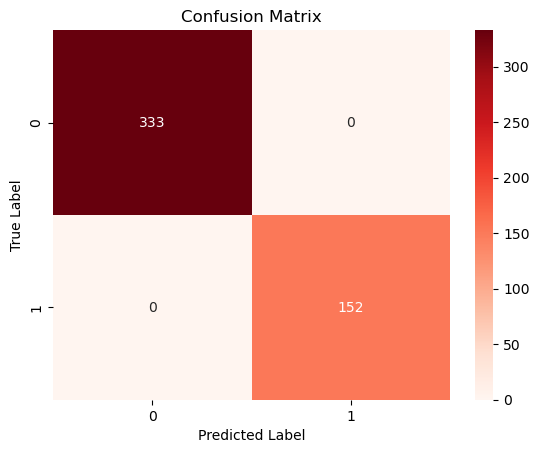

In [95]:
sns.heatmap(rfc_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

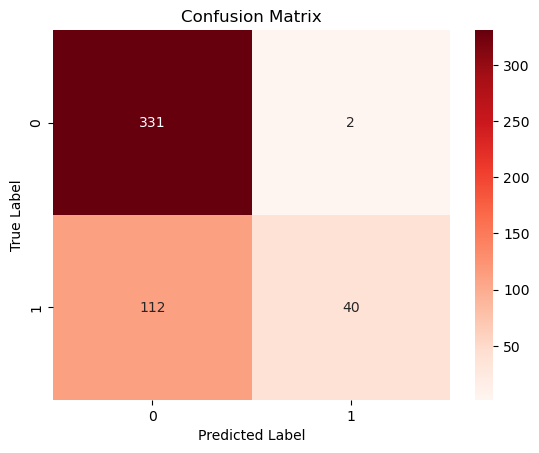

In [96]:
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [97]:
knn_train_accuracy_score = accuracy_score(y_train, knn_y_train_predict, normalize=True) 
knn_test_accuracy_score = accuracy_score(y_test, knn_y_test_predict, normalize=True)  

print('train accuracy: ', knn_train_accuracy_score)
print('test accuracy: ', knn_test_accuracy_score)

train accuracy:  0.7993890020366599
test accuracy:  0.7216494845360825


In [98]:
gnb_train_accuracy_score = accuracy_score(y_train, gnb_y_train_predict, normalize=True)
gnb_test_accuracy_score = accuracy_score(y_test, gnb_y_test_predict, normalize=True)

print('train accuracy: ', gnb_train_accuracy_score)
print('test accuracy: ', gnb_test_accuracy_score)

train accuracy:  1.0
test accuracy:  1.0


In [99]:
rfc_train_accuracy_score = accuracy_score(y_train, rfc_y_train_predict, normalize=True)
rfc_test_accuracy_score = accuracy_score(y_test, rfc_y_test_predict, normalize=True)

print('train accuracy: ', rfc_train_accuracy_score)
print('test accuracy: ', rfc_test_accuracy_score)

train accuracy:  1.0
test accuracy:  1.0


In [100]:
lr_train_accuracy_score = accuracy_score(y_train, lr_y_train_predict, normalize=True)
lr_test_accuracy_score = accuracy_score(y_test, lr_y_test_predict, normalize=True)

print('train accuracy: ', lr_train_accuracy_score)
print('test accuracy: ', lr_test_accuracy_score)

train accuracy:  0.7718940936863544
test accuracy:  0.7649484536082474


In [101]:
knn_mean_squared_error = mean_squared_error(y_test, knn_y_test_predict)
knn_mean_absolute_error = mean_absolute_error(y_test, knn_y_test_predict)
print('test mean_squared_error: ', knn_mean_squared_error)
print('test mean_absolute_error: ', knn_mean_absolute_error)

test mean_squared_error:  0.27835051546391754
test mean_absolute_error:  0.27835051546391754


In [102]:
gnb_mean_squared_error = mean_squared_error(y_test, gnb_y_test_predict)
gnb_mean_absolute_error = mean_absolute_error(y_test, gnb_y_test_predict)

print('test mean_squared_error: ', gnb_mean_squared_error)
print('test mean_absolute_error: ', gnb_mean_absolute_error)

test mean_squared_error:  0.0
test mean_absolute_error:  0.0


In [103]:
rfc_mean_squared_error = mean_squared_error(y_test, rfc_y_test_predict)
rfc_mean_absolute_error = mean_absolute_error(y_test, rfc_y_test_predict)

print('test mean_squared_error: ', rfc_mean_squared_error)
print('test mean_absolute_error: ', rfc_mean_absolute_error)

test mean_squared_error:  0.0
test mean_absolute_error:  0.0


In [104]:
lr_mean_squared_error = mean_squared_error(y_test, lr_y_test_predict)
lr_mean_absolute_error = mean_absolute_error(y_test, lr_y_test_predict)

print('test mean_squared_error: ', lr_mean_squared_error)
print('test mean_absolute_error: ', lr_mean_absolute_error)

test mean_squared_error:  0.23505154639175257
test mean_absolute_error:  0.23505154639175257


In [105]:
knn_precision_score = precision_score(y_test, knn_y_test_predict)
print('test precision_score: ', knn_precision_score)

test precision_score:  0.5876288659793815


In [106]:
gnb_precision_score = precision_score(y_test, gnb_y_test_predict)
print('test precision_score: ', gnb_precision_score)

test precision_score:  1.0


In [107]:
rfc_precision_score = precision_score(y_test, rfc_y_test_predict)
print('test precision_score: ', rfc_precision_score)

test precision_score:  1.0


In [108]:
lr_precision_score = precision_score(y_test, lr_y_test_predict)
print('test precision_score: ', lr_precision_score)

test precision_score:  0.9523809523809523


In [109]:
knn_recall_score = recall_score(y_test, knn_y_test_predict)
print('test recall_score: ', knn_recall_score)

test recall_score:  0.375


In [110]:
gnb_recall_score = recall_score(y_test, gnb_y_test_predict)
print('test recall_score: ', gnb_recall_score)

test recall_score:  1.0


In [111]:
rfc_recall_score = recall_score(y_test, rfc_y_test_predict)
print('test recall_score: ', rfc_recall_score)

test recall_score:  1.0


In [112]:
lr_recall_score = recall_score(y_test, lr_y_test_predict)
print('test recall_score: ', lr_recall_score)

test recall_score:  0.2631578947368421


In [113]:
knn_f1_score = f1_score(y_test, knn_y_test_predict)
print('test f1_score: ', knn_f1_score)

test f1_score:  0.4578313253012048


In [114]:
gnb_f1_score =  f1_score(y_test, gnb_y_test_predict)
print('test f1_score: ', gnb_f1_score)

test f1_score:  1.0


In [115]:
rfc_f1_score =  f1_score(y_test, rfc_y_test_predict)
print('test f1_score: ', rfc_f1_score)

test f1_score:  1.0


In [116]:
lr_f1_score = f1_score(y_test, lr_y_test_predict)
print('test f1_score: ', lr_f1_score)

test f1_score:  0.41237113402061853


In [117]:
print(classification_report( y_test, knn_y_test_predict))

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       333
           1       0.59      0.38      0.46       152

    accuracy                           0.72       485
   macro avg       0.67      0.63      0.64       485
weighted avg       0.70      0.72      0.70       485



In [118]:
print(classification_report( y_test, gnb_y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       152

    accuracy                           1.00       485
   macro avg       1.00      1.00      1.00       485
weighted avg       1.00      1.00      1.00       485



In [119]:
print(classification_report( y_test, rfc_y_test_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       152

    accuracy                           1.00       485
   macro avg       1.00      1.00      1.00       485
weighted avg       1.00      1.00      1.00       485



In [120]:
print(classification_report( y_test, lr_y_test_predict))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85       333
           1       0.95      0.26      0.41       152

    accuracy                           0.76       485
   macro avg       0.85      0.63      0.63       485
weighted avg       0.81      0.76      0.71       485



In [121]:
from sklearn.metrics import RocCurveDisplay

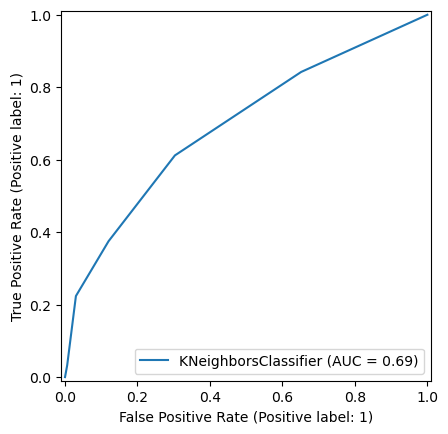

In [122]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_test, y_test)

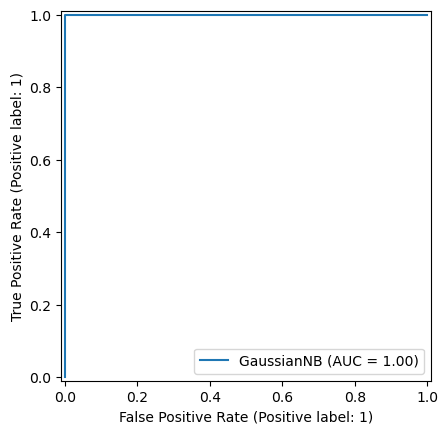

In [123]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_test, y_test)

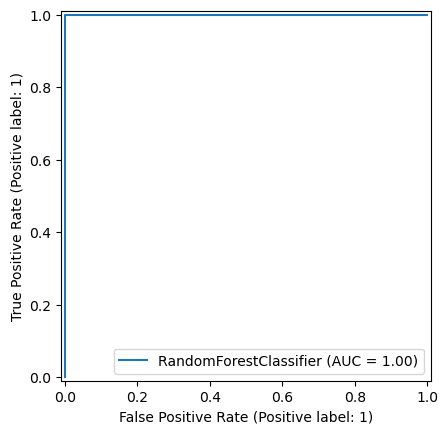

In [124]:
svc_disp = RocCurveDisplay.from_estimator(rfc, X_test, y_test)

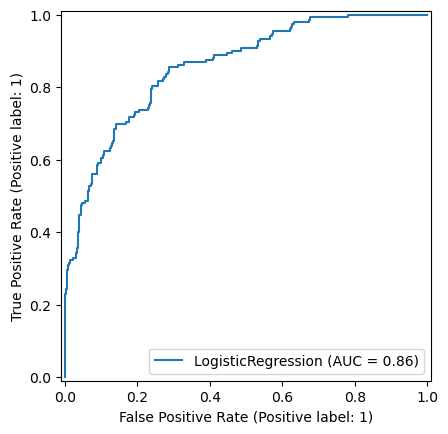

In [125]:
svc_disp = RocCurveDisplay.from_estimator(lr, X_test.values, y_test)

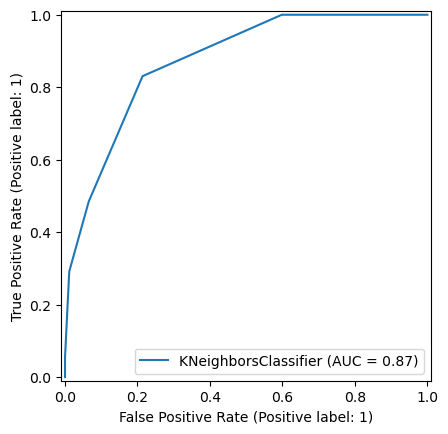

In [126]:
svc_disp = RocCurveDisplay.from_estimator(knn, X_train, y_train)

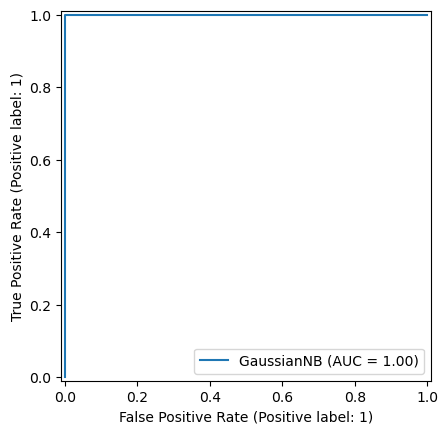

In [127]:
svc_disp = RocCurveDisplay.from_estimator(gnb, X_train, y_train)

In [128]:
from sklearn.metrics import roc_auc_score

In [129]:
knn_roc = roc_auc_score(y_test, knn_y_test_predict, average='macro')
knn_roc

0.62743993993994

In [130]:
gnb_roc = roc_auc_score(y_test, gnb_y_test_predict, average='macro')
gnb_roc 

1.0

In [131]:
rfc_roc = roc_auc_score(y_test, rfc_y_test_predict, average='macro')
rfc_roc

1.0

In [132]:
lr_roc = roc_auc_score(y_test, lr_y_test_predict, average='macro')
lr_roc

0.6285759443654181

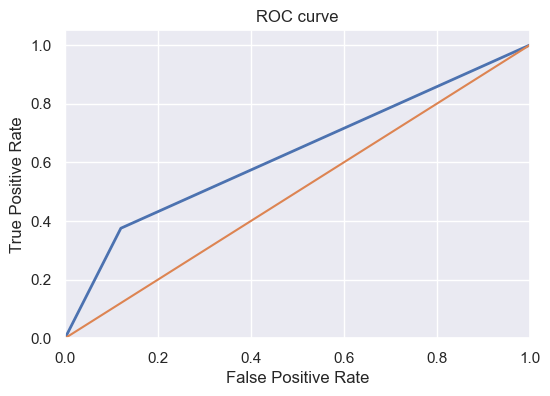

In [133]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, knn_y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

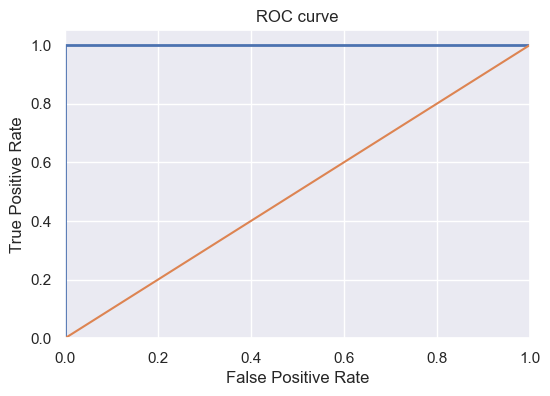

In [134]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, gnb_y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

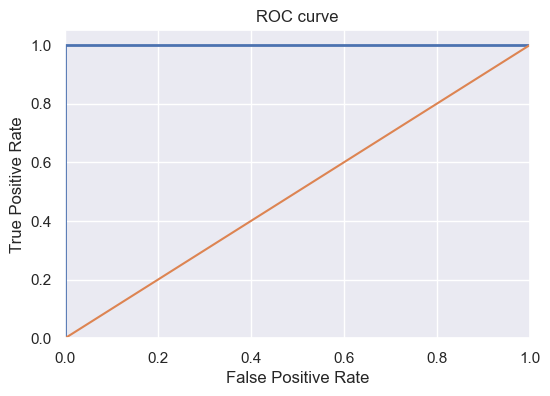

In [135]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, rfc_y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

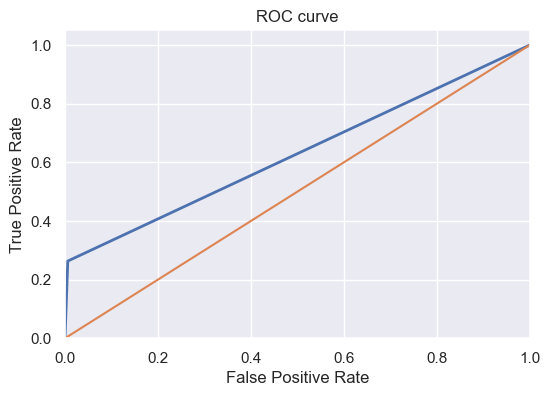

In [136]:
from matplotlib.pylab import rc, plot
from sklearn.metrics import roc_curve

sns.set(font_scale=1)
sns.set_color_codes("muted")

plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, lr_y_test_predict, pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

In [137]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier", "Logistic Regression"]

log_cols = ["Classifier", "train accuracy", "test accuracy","mean_absolute_error", 
            "mean_squared_error", "precision_score", "recall_score", "f1_score", "roc_auc_score"]
log = pd.DataFrame(columns=log_cols)
log["Classifier"] = classifiers
log["train accuracy"] = [knn_train_accuracy_score, gnb_train_accuracy_score,rfc_train_accuracy_score ,lr_train_accuracy_score]
log["test accuracy"] = [ knn_test_accuracy_score,  gnb_test_accuracy_score, rfc_test_accuracy_score , lr_test_accuracy_score]
log["mean_squared_error"] = [knn_mean_squared_error, gnb_mean_squared_error, rfc_mean_squared_error, lr_mean_squared_error]
log["mean_absolute_error"] = [knn_mean_absolute_error, gnb_mean_absolute_error, rfc_mean_absolute_error, lr_mean_absolute_error]
log["precision_score"] = [knn_precision_score,gnb_precision_score,rfc_precision_score,lr_precision_score]
log["recall_score"] = [knn_recall_score,gnb_recall_score,rfc_recall_score,lr_recall_score]
log["f1_score"] = [knn_f1_score,gnb_f1_score,rfc_f1_score,lr_f1_score]
log["roc_auc_score"] = [knn_roc,gnb_roc,rfc_roc,lr_roc]

In [138]:
log

,Classifier,train accuracy,test accuracy,mean_absolute_error,mean_squared_error,precision_score,recall_score,f1_score,roc_auc_score
0,KNeighborsClassifier,0.799389,0.721649,0.278351,0.278351,0.587629,0.375000,0.457831,0.627440
1,Gaussian Naive Bayes,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
2,Random Forest Classifier,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
3,Logistic Regression,0.771894,0.764948,0.235052,0.235052,0.952381,0.263158,0.412371,0.628576
